In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 3) US Baby Names 1880–2017

Podatki: http://www.ssa.gov/oact/babynames/limits.html.

In [2]:
!head -n 10 data/DATA_03_names/yob1880.txt

In [3]:
names1880=pd.read_csv('data/DATA_03_names/yob1880.txt', names=['ime','spol','stevilo'])

In [4]:
names1880.head()

,ime,spol,stevilo
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby('spol')['stevilo'].sum()

spol
F     90993
M    110491
Name: stevilo, dtype: int64

In [6]:
# uvoz vseh podatkov vseh let v en dataframe

years=range(1880, 2018) #vključno z 2017
pieces=[]
columns=['ime','spol','stevilo']

In [7]:
for year in years:
    path=f'data/DATA_03_names/yob{year}.txt'
    frame=pd.read_csv(path, names=columns)
    frame['leto']=year
    pieces.append(frame)

In [8]:
pieces #dobimo veliko dataframov

[            ime spol  stevilo  leto
 0          Mary    F     7065  1880
 1          Anna    F     2604  1880
 2          Emma    F     2003  1880
 3     Elizabeth    F     1939  1880
 4        Minnie    F     1746  1880
 5      Margaret    F     1578  1880
 6           Ida    F     1472  1880
 7         Alice    F     1414  1880
 8        Bertha    F     1320  1880
 9         Sarah    F     1288  1880
 10        Annie    F     1258  1880
 11        Clara    F     1226  1880
 12         Ella    F     1156  1880
 13     Florence    F     1063  1880
 14         Cora    F     1045  1880
 15       Martha    F     1040  1880
 16        Laura    F     1012  1880
 17       Nellie    F      995  1880
 18        Grace    F      982  1880
 19       Carrie    F      949  1880
 20        Maude    F      858  1880
 21        Mabel    F      808  1880
 22       Bessie    F      796  1880
 23       Jennie    F      793  1880
 24     Gertrude    F      787  1880
 25        Julia    F      783  1880
 

In [9]:
names=pd.concat(pieces,ignore_index=True)
names.head()

,ime,spol,stevilo,leto
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
ime        object
spol       object
stevilo    int64
leto       int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


In [11]:
# za višjenivojsko grupiranje uporabljamo pivot_table knjižnico

total_births=names.pivot_table('stevilo', index='leto',columns='spol', aggfunc=sum)

In [12]:
total_births[:10]

spol,F,M
leto,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442
1885,133055,107799
1886,144533,110784
1887,145981,101413
1888,178622,120851


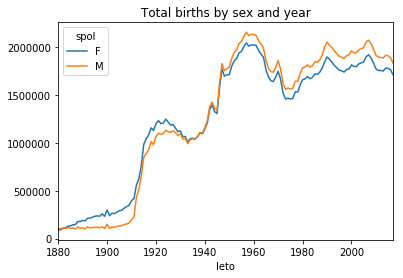

In [15]:
total_births.plot(title='Total births by sex and year')

In [21]:
# izračun vrjetnosti, da si dobil določeno ime v določenem letu

def add_prop(group):
    group['prop']=group['stevilo']/group['stevilo'].sum()
    return group

In [22]:
names=names.groupby(['leto','spol']).apply(add_prop)
names.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [23]:
names.groupby(['leto','spol'])['prop'].sum().head(10)

leto  spol
1880  F       1.0
      M       1.0
1881  F       1.0
      M       1.0
1882  F       1.0
      M       1.0
1883  F       1.0
      M       1.0
1884  F       1.0
      M       1.0
Name: prop, dtype: float64

In [24]:
# izberi 1000 najbolj pogostih imen

def get_top1000(group):
    return group.sort_values(by='stevilo',ascending=False)[:1000]

In [25]:
grouped=names.groupby(['leto','spol'])
top1000=grouped.apply(get_top1000)
top1000.head()

ime spol  stevilo  leto      prop
leto spol                                           
1880 F    0       Mary    F     7065  1880  0.077643
          1       Anna    F     2604  1880  0.028618
          2       Emma    F     2003  1880  0.022013
          3  Elizabeth    F     1939  1880  0.021309
          4     Minnie    F     1746  1880  0.019188

In [26]:
top1000.reset_index(inplace=True,drop=True)
top1000.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [27]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275877 entries, 0 to 275876
Data columns (total 5 columns):
ime        275877 non-null object
spol       275877 non-null object
stevilo    275877 non-null int64
leto       275877 non-null int64
prop       275877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ MB


In [29]:
boys = top1000[top1000['spol']=='M']
girls=top1000[top1000['spol']=='F']


In [32]:
boys.head()


,ime,spol,stevilo,leto,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
944,James,M,5927,1880,0.053642
945,Charles,M,5348,1880,0.048402
946,George,M,5126,1880,0.046393


In [31]:
girls.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [36]:
#izisi pogostost imena v določenih imenih.

total_births=top1000.pivot_table('stevilo',index='leto', columns='ime',aggfunc=sum)
total_births.head()

ime,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
leto,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN


In [37]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


In [45]:
subset=total_births[['John','Harry','Mary','Khaleesi','Jon','Arya',]]

In [41]:
subset.tail()

ime,John,Harry,Mary,Khaleesi,Jon,Arya
leto,,,,,,
2013,10704.0,328.0,2646.0,NaN,386.0,1138.0
2014,10687.0,336.0,2630.0,369.0,376.0,1553.0
2015,10373.0,301.0,2624.0,341.0,330.0,1641.0
2016,9995.0,374.0,2504.0,371.0,354.0,1895.0
2017,9434.0,397.0,2381.0,466.0,318.0,2156.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7b589e1d0>,
      dtype=object)

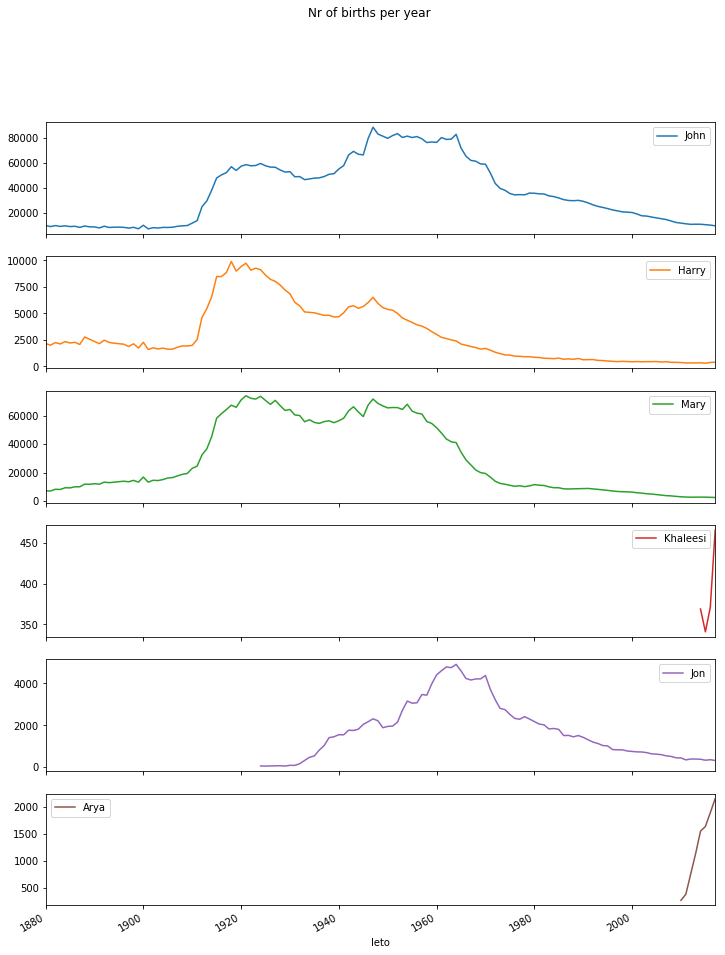

In [42]:
subset.plot(subplots=True,figsize=(12,16),grid=False,title='Nr of births per year')

In [46]:
table=top1000.pivot_table('prop',index='leto',columns='spol',aggfunc=sum)
table.head()

spol,F,M
leto,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


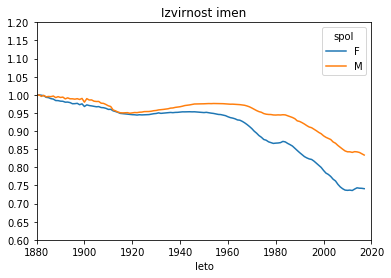

In [47]:
table.plot(title='Izvirnost imen', yticks=np.linspace(0.6,1.2,13),xticks=range(1880,2030,20))